# Multi-Omic Data Analysis
In the first part of this notebook, we will look at putting together all of the -omics that we have seen so far: genomics, transcriptomics, and proteomics. 
<br></br>
In the second part of this notebook, your assignment is to put this into action and demonstrate a general knowledge of the different -omics using both TCGA and CPTAC data.

In [48]:
import cptac
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [92]:
os.chdir("/Users/soniaqi/Documents/QBio-490/qbio_490_sonia/analysis_data")

In [62]:
#cptac.download('Brca') # shouldn't need this if already downloaded
brca = cptac.Brca()

clinical = brca.get_clinical() # Clinical Data
mutation = brca.get_somatic_mutation() # Genomic Data
rna = brca.get_transcriptomics() # Transcriptomic Data
protein = brca.get_proteomics() # Proteomic Data
protein.columns = protein.columns.get_level_values(0) # Fix protein data columns

## Let's revisit the structure of our different -omics...
### Clinical

This is the data about the patient that was collected at the time that the sample was taken.
Rows are patients, columns are variables.

In [5]:
clinical.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


### Mutation
Our mutation data looks a little different than it did as a MAF file, but the important information is still here. Rows are patients, Gene is the name of the gene, Mutation is the type of mutation, and Location is where the mutation occurs.

In [6]:
mutation.head()

Name,Gene,Mutation,Location
Patient_ID,,,
CPT000814,ABCG8,Missense_Mutation,p.V660L
CPT000814,ACTRT1,Missense_Mutation,p.S138F
CPT000814,ADA,Missense_Mutation,p.A73T
CPT000814,AHCTF1,Frame_Shift_Del,p.I1012Sfs*9
CPT000814,ANGPTL4,Silent,p.C341C


### RNA and Protein
These both look exactly the same. The rows are patients, columns are genes, and the numbers represent log2 fold change compared to the standard. Note that the RNA DataFrame has roughly 2x as many columns as the Protein DataFrame. This is because of non-coding genes. 

In [7]:
rna.head()

Name,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,1.9265,2.4267,NaN,5.3718,3.6437,-4.5301,-5.2608,0.6260,NaN,4.7000,...,3.2268,5.1482,-0.0202,0.9270,5.1699,3.1333,0.9835,5.9499,2.8499,3.6497
CPT001846,3.6578,2.6524,NaN,5.3253,-5.1069,-0.7692,5.6915,3.2060,NaN,4.3115,...,3.2532,3.9191,-1.4924,-0.3262,3.2163,NaN,2.0909,7.0671,2.0780,3.2274
X01BR001,0.9896,2.6363,NaN,5.4734,-1.5052,-2.0918,NaN,1.8816,NaN,3.3434,...,1.9491,2.2365,0.1694,1.3074,2.8806,0.5653,1.5682,4.3852,2.1573,2.1127
X01BR008,0.5535,2.2119,NaN,5.8701,3.2708,-1.9902,-5.0414,0.6957,NaN,4.3095,...,3.1575,5.7822,-1.3608,0.3015,3.2620,1.7578,0.2989,5.4697,3.1783,3.1939
X01BR009,2.8359,3.3449,NaN,6.9307,2.6488,-3.1664,NaN,1.9784,-5.7975,4.6341,...,2.7678,3.5378,-0.5147,0.2798,3.0986,-3.2737,1.3036,5.0219,3.6868,2.8524


In [8]:
protein.head()

Name,A1BG,A2M,A2ML1,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,NaN,1.6708,-0.3484,-0.4756,-0.7299,...,-5.2868,-0.6536,0.3384,2.1169,1.3910,-2.1230,0.9136,-0.8082,-1.4793,0.9136
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,NaN,2.1022,-0.5814,0.2916,-2.2857,...,-0.7592,0.4711,0.6018,0.2062,-0.2137,-2.1219,0.0860,2.5814,-0.2852,-0.1074
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,1.2255,0.2754,-1.1187,-0.0534,-0.2519,...,NaN,0.2306,-0.3010,0.3395,-0.5316,NaN,0.4996,0.7622,-1.5607,0.0256
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,NaN,NaN,-1.0691,-0.3643,-1.8173,...,-2.1789,0.2695,0.1506,1.0498,0.7546,1.7889,-0.2499,-0.2590,-0.1263,0.3725
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,NaN,NaN,-2.0471,-0.3547,-0.8298,...,-2.3990,-0.2596,0.1898,-0.5010,-0.4189,0.3080,0.5057,0.2181,-0.2288,-0.2750


## Reformatting data
### Finding shared patients
All 4 DataFrames we have here share the common characteristic that the rows are the patient_IDs. This is actually really helpful! However, not all DataFrames have the same number of patients. For example, the mutation DataFrame has many times more rows than patients because each patient shows up everytime for a new mutation. Othertimes, you have masked out some patients from a DataFrame but not the other. In order to find the shared patients between DataFrames, we can use the np.intersect1d() function.

In [ ]:
# skeleton code

patients_df1 = df1.index # the indices of each DF are the patients within that DF
patients_df2 = df2.index

shared_patients = np.intersect1d(patients_df1, patients_df2) # find shared and save indices

shared_df1 = df1.loc[shared_patients, :] # use our list of shared patients to grab only those patients
shared_df2 = df2.loc[shared_patients, :] # notice we are grabbing all columns and assigning to new df

Example

In [64]:
high_MUC16_prot = protein[protein.loc[:, 'MUC16'] > 1]
high_MUC16_RNA = rna[rna.loc[:, 'MUC16'] > 1]

shared_MUC16 = np.intersect1d(high_MUC16_prot.index, high_MUC16_RNA.index)

print(f'prot rows: {len(high_MUC16_prot)}')
print(f'RNA rows: {len(high_MUC16_RNA)}')
print(f'shared patients: {len(shared_MUC16)}')

prot rows: 27
RNA rows: 32
shared patients: 13


### Counting # of Somatic Mutations in Individual
Say we wanted to look at how the number of mutations in MUC16 relate to RNA and protein expression. How do we do this? We can't use the prior approach since the Mutation DF has many more rows than # of patients. We want to get a count of the number of MUC16 mutations in each patient. We can use the  Series.value_counts() method.

In [65]:
# Start by getting only mutations you are interested in
MUC16_mutat_mask = mutation.loc[:, 'Gene'] == 'MUC16'
MUC16_mutations = mutation.loc[MUC16_mutat_mask, :]
MUC16_mutations.head()

Name,Gene,Mutation,Location
Patient_ID,,,
CPT001846,MUC16,Missense_Mutation,p.K3653Q
X01BR023,MUC16,Missense_Mutation,p.T13038A
X01BR026,MUC16,Silent,p.G13669G
X01BR026,MUC16,Silent,p.V13666V
X01BR043,MUC16,Missense_Mutation,p.R14400Q


In [66]:
# Then get a list of the patient names (hint: the index)
patients_with_mutation = MUC16_mutations.index

# Then use the value_counts() function to count how many times each patient appears
MUC16_counts = patients_with_mutation.value_counts()
print(MUC16_counts)

X01BR043     30
X01BR026      2
X20BR006      2
X18BR003      2
CPT001846     1
X11BR050      1
X18BR007      1
X14BR005      1
X11BR080      1
X11BR060      1
X11BR010      1
X11BR031      1
X01BR023      1
X11BR006      1
X11BR003      1
X09BR007      1
X09BR004      1
X06BR003      1
X20BR007      1
Name: Patient_ID, dtype: int64


Wow it looks like one patient, X01BR043, has the majority of all MUC16 mutations. Let's see what fraction of our MUC16 patients are in our shared high MUC16 RNA and Protein list from before

In [67]:
np.intersect1d(MUC16_counts.index, shared_MUC16)

array(['X09BR004', 'X09BR007'], dtype=object)

Only two patients were shared between the list. Perhaps this means that the converse is true.. that mutations are linked to lower gene expression. Let's put all of this data together for our analysis.

In [68]:
patients_df = pd.DataFrame(
    columns=['MUC16_Mutations', 'RNA_Expression', 'Protein_Expression'], 
    index=clinical.index)

patients_df

,MUC16_Mutations,RNA_Expression,Protein_Expression
Patient_ID,,,
CPT000814,NaN,NaN,NaN
CPT001846,NaN,NaN,NaN
X01BR001,NaN,NaN,NaN
X01BR008,NaN,NaN,NaN
X01BR009,NaN,NaN,NaN
...,...,...,...
X21BR001,NaN,NaN,NaN
X21BR002,NaN,NaN,NaN
X21BR010,NaN,NaN,NaN


Now that we have our DataFrame, let's fill in the values.

In [69]:
patients_df.loc[MUC16_counts.index, 'MUC16_Mutations'] = MUC16_counts
patients_df.loc[patients_df.index.difference(MUC16_counts.index), 'MUC16_Mutations'] = 0
# df.index.difference(list) gives you all of the indices for the rows that are not in that list
# here, we are setting all of the patients who don't appear in MUC16_Mutations to have 0 mutations

patients_df.loc[:, 'RNA_Expression'] = rna.loc[:, 'MUC16']
patients_df.loc[:, 'Protein_Expression'] = protein.loc[:, 'MUC16']

In [70]:
print(patients_df.isna().sum()) # count number of NAs in each column, let's drop the rows with NAs
patients_df.dropna(axis=0, inplace=True) # drops rows with NA values, alternatively use axis=1 to drop columns

           MUC16_Mutations  RNA_Expression  Protein_Expression
Patient_ID                                                    
CPT000814                0          8.7376             -0.8552
CPT001846                1        -10.9632             -0.0116
X01BR001                 0          4.6687              4.0843
X01BR008                 0          5.2877             -0.1378
X01BR009                 0          3.6755              2.0518
...                    ...             ...                 ...
X21BR001                 0         -0.1857             -1.0433
X21BR002                 0          0.4928              2.2425
X21BR010                 0         -8.7107             -1.3975
X22BR005                 0         -4.4960             -0.1958
X22BR006                 0         -2.5695             -4.9140

[122 rows x 3 columns]
MUC16_Mutations       0
RNA_Expression        3
Protein_Expression    6
dtype: int64
           MUC16_Mutations  RNA_Expression  Protein_Expression
Patient_I

Let's see if we can gain anything from a UMAP of our data...

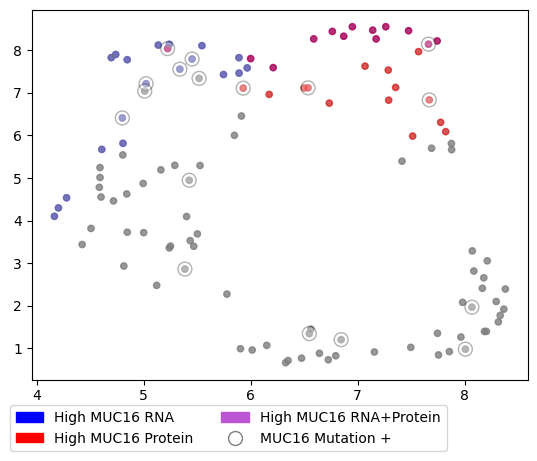

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from umap import UMAP
import matplotlib.patches as mpatches
import matplotlib.lines as lines

reducer = UMAP()
transformed_df = scaler.fit_transform(patients_df)
embedding = reducer.fit_transform(transformed_df)

colors_rna = np.where(patients_df.loc[:, 'RNA_Expression'] > 1, 'blue', 'grey')
colors_protein = np.where(patients_df.loc[:, 'Protein_Expression'] > 1, 'red', 'grey')
show_mutations = np.where(patients_df.loc[:, 'MUC16_Mutations'] > 0, 0.3, 0)

fig, ax = plt.subplots()

ax.scatter(embedding[:, 0], embedding[:, 1], c=colors_rna, s=20, alpha=0.6)
ax.scatter(embedding[:, 0], embedding[:, 1], c=colors_protein, s=20, alpha=0.5)
ax.scatter(embedding[:, 0], embedding[:, 1], alpha=show_mutations, color='white', s=100, edgecolor='Black')

rna = mpatches.Patch(color='blue', label='High MUC16 RNA')
protein = mpatches.Patch(color='red', label='High MUC16 Protein')
shared = mpatches.Patch(color='mediumorchid', label='High MUC16 RNA+Protein')
mutations = lines.Line2D([], [], color="white", alpha=0.5, marker='o', markersize=10, markerfacecolor="white", markeredgecolor='black', label='MUC16 Mutation +')

ax.legend(handles=[rna, protein, shared, mutations], bbox_to_anchor=[0.85,-0.05], fancybox=True, ncol=2)

From our plot, we can see that while the Mutation+ patients tend to be spread throughout the different categories, it doesn't seem like many are high in both MUC16 RNA expression AND MUC16 Protein expression.

## Assignment
This assignment has 2 parts and unlike the past few assignments, it will be more open-ended. Grading will be based on effort and thoughtful analysis, not whether your data was significant.

**Exercise 1** - Investigate the Central Dogma (5pt)
<br>
Complete a multi-omic analysis analysis of a gene, looking at how mutation rate, RNA expression, and protein expression are correlated (or not!). Choose your gene logically and include a justification (e.g. relative protein abundance, , high nonsense mutation rate, based in the literature as having implications with breast cancer, etc)
You may not use any of the following genes: TP53, TTN, PIK3CA, MUC16, BRCA1/2
<br> </br>
Include the following (1pt each):
+ Justification for choosing the gene (e.g. relevant code used to pick or link to research article). One to two sentence explanation of the function of the gene.
+ Examination of the somatic mutations with respect to type, number per individual, or density
+ Some form of figure that shows relationship between RNA expression and Protein Expression
+ A statistical test that gives a p-value. Interpret the p-value in terms of the test and the data. We've mostly looked at correlation tests but you don't necessarily have to use one. Scipy.stats is a great resource https://docs.scipy.org/doc/scipy/reference/stats.html#correlation-functions
+ Three to four sentence writeup of your thoughts behind why you got the results you got (just brainstorm some ideas, it doesn't need to be super thorough)

Remember: If there is no correlation, state that, you don't need to try multiple genes if you aren't getting promising results.

In [82]:
# write code here
# According to literatures, PTEN controls cell growth, so mutations in PTEN increases the risk of having tumors
brca = cptac.Brca()
clinical = brca.get_clinical() # Clinical Data
mutation = brca.get_somatic_mutation() # Genomic Data
rna = brca.get_transcriptomics() # Transcriptomic Data
protein = brca.get_proteomics() # Proteomic Data
protein.columns = protein.columns.get_level_values(0) # Fix protein data columns
# load data to avoid "patch has no loc" error

high_PTEN_prot = protein[protein.loc[:, 'PTEN'] > 1]
high_PTEN_RNA = rna[rna.loc[:, 'PTEN'] > 1]

shared_PTEN = np.intersect1d(high_PTEN_prot.index, high_PTEN_RNA.index)

PTEN_mutat_mask = mutation.loc[:, 'Gene'] == 'PTEN'
PTEN_mutations = mutation.loc[PTEN_mutat_mask, :]
print(PTEN_mutations)

patients_with_mutation = PTEN_mutations.index
PTEN_counts = patients_with_mutation.value_counts()
print('# of mutations for each patient: ')
print(PTEN_counts)

np.intersect1d(PTEN_counts.index, shared_PTEN) # only 1 patient is shared between the list

patients_df = pd.DataFrame(
    columns=['PTEN_Mutations', 'RNA_Expression', 'Protein_Expression'], 
    index=clinical.index)

patients_df.loc[PTEN_counts.index, 'PTEN_Mutations'] = PTEN_counts
patients_df.loc[patients_df.index.difference(PTEN_counts.index), 'PTEN_Mutations'] = 0

patients_df.loc[:, 'RNA_Expression'] = rna.loc[:, 'PTEN']
patients_df.loc[:, 'Protein_Expression'] = protein.loc[:, 'PTEN']

patients_df.dropna(axis=0, inplace=True)

Name        Gene           Mutation       Location
Patient_ID                                        
X03BR004    PTEN    Frame_Shift_Del   p.E242Vfs*10
X03BR010    PTEN  Missense_Mutation        p.R130Q
X11BR028    PTEN  Missense_Mutation        p.Q171E
X11BR032    PTEN        Splice_Site   p.X70_splice
X11BR074    PTEN        Splice_Site  p.X212_splice
X11BR074    PTEN        Splice_Site  p.X212_splice
X11BR080    PTEN  Missense_Mutation         p.L70R
X18BR016    PTEN    Frame_Shift_Del    p.V249Cfs*7
X18BR016    PTEN    Frame_Shift_Del        p.T319*
X20BR002    PTEN  Missense_Mutation         p.H75P
X20BR006    PTEN  Nonsense_Mutation        p.Y177*
# of mutations for each patient
X11BR074    2
X18BR016    2
X03BR004    1
X03BR010    1
X11BR028    1
X11BR032    1
X11BR080    1
X20BR002    1
X20BR006    1
Name: Patient_ID, dtype: int64


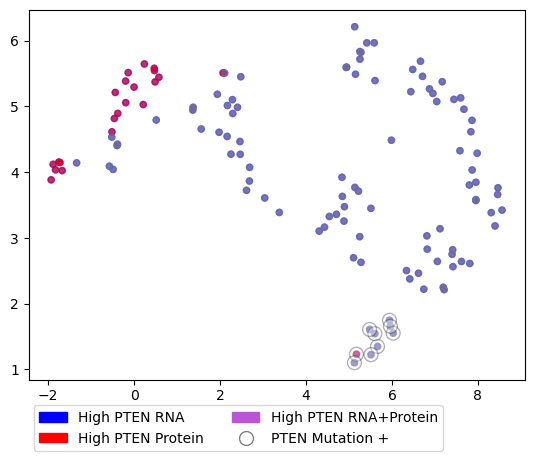

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from umap import UMAP
import matplotlib.patches as mpatches
import matplotlib.lines as lines

reducer = UMAP()
transformed_df = scaler.fit_transform(patients_df)
embedding = reducer.fit_transform(transformed_df)

colors_rna = np.where(patients_df.loc[:, 'RNA_Expression'] > 1, 'blue', 'grey')
colors_protein = np.where(patients_df.loc[:, 'Protein_Expression'] > 1, 'red', 'grey')
show_mutations = np.where(patients_df.loc[:, 'PTEN_Mutations'] > 0, 0.3, 0)

fig, ax = plt.subplots()

ax.scatter(embedding[:, 0], embedding[:, 1], c=colors_rna, s=20, alpha=0.6)
ax.scatter(embedding[:, 0], embedding[:, 1], c=colors_protein, s=20, alpha=0.5)
ax.scatter(embedding[:, 0], embedding[:, 1], alpha=show_mutations, color='white', s=100, edgecolor='Black')

rna = mpatches.Patch(color='blue', label='High PTEN RNA')
protein = mpatches.Patch(color='red', label='High PTEN Protein')
shared = mpatches.Patch(color='mediumorchid', label='High PTEN RNA+Protein')
mutations = lines.Line2D([], [], color="white", alpha=0.5, marker='o', markersize=10, markerfacecolor="white", markeredgecolor='black', label='PTEN Mutation +')

ax.legend(handles=[rna, protein, shared, mutations], bbox_to_anchor=[0.85,-0.05], fancybox=True, ncol=2)

In [84]:
import scipy
from scipy import stats

stats.pearsonr(patients_df.loc[:, 'RNA_Expression'], patients_df.loc[:, 'Protein_Expression'], alternative = 'two-sided')

# The correlation coefficient of 0.511 suggests that there is a moderate positive relationship between the expression
# of PTEN in RNA and PTEN in proteins. Because the p-value is much smaller than 0.05, this relationship is 
# statistically significant. Patients with a high PTEN RNA expression are more likely to have high PTEN protein 
# expression, although factors like mutations may cause failed translation, so the PTEN gene would not be expressed in
# proteins.

PearsonRResult(statistic=0.511006062761377, pvalue=1.8098589993164118e-09)

**Exercise 2** - Looking for Connections (5pt)
As the types or size of data increases, it can be harder to find patterns within the data. This presents a perfect opportunity to use one of our newest techniques: machine learning. In this exercise, you will attempt to predict a clinical variable based on genetic and mutation data. 
<br></br>
Our clinical data from CPTAC is pretty sparse however, and doesn't give us much in the way to predict. Luckily, we can use our TCGA data just as easily. Using the pd.read_csv() functions, read in your clinical, mutation, and transcriptomic data. 
<br></br>
Your task is as follows (1pt each):
+ Load in your TCGA analysis_data and choose one of the following clinical variables:
 vital_status, days_to_last_known_alive/days_to_death/days_to_last_followup (combine), histological_type, age_at_initial_pathologic_diagnosis, lymph_node_examined_count or breast_carcinoma_progesterone_receptor_status.
+ Determine which genes you want to use for your regressor/classifier (you can use ones we've looked at, genes which are commonly associated with breast cancer outcomes, the most mutated genes, etc) and create a DataFrame that includes those genes RNA and mutation data. You can choose which data/how many data dimensions you want.
+ Train a regressor/classifier (your choice of which method) on your chosen data with the target being your chosen variable (hint: if you choose a categorical variable, you will need to use a LabelEncoder())
+ Measure and interpret the accuracy of the model. If you do not get above a 0.5 accuracy (for classification) or within 10% of the target (regression), retry with a different ML model, train test split, or genes used. If you cannot meet any of the goals within 5 tries, move on (it's okay!).
+ Write a few sentences about why a machine learning algorithm like a regressor/classifier would be important in a clinical setting. Depending on whether you got it within 5 tries or not, discuss why you think your genes/parameters were/were not able to predict it.

In [208]:
# loading data
import pandas as pd
clinical_data = pd.read_csv('brca_clinical_data.csv', index_col=0) 
mutation_data = pd.read_csv('brca_mutation_data.csv')
rna_data = pd.read_csv('brca_rna_count_data.csv', index_col=0)

clinical_data = clinical_data.drop_duplicates()
rna_data = rna_data.drop_duplicates()
mutation_counts = mutation_data['Hugo_Symbol'].value_counts()
mutation_counts[:10]

PIK3CA    369
TP53      348
TTN       268
CDH1      134
GATA3     127
MUC16     124
MAP3K1    122
KMT2C      93
HMCN1      72
RYR2       69
Name: Hugo_Symbol, dtype: int64

In [237]:
rna_data = rna_data.rename(columns={col: col[:12] for col in rna_data.columns})
rna_columns_mask = rna_data.columns[~rna_data.columns.isin(clinical_data.index)]
rna_data = rna_data.drop(columns=rna_columns_mask)

RNA_mutation = pd.DataFrame(
    columns=['PIK3CA','TP53','TTN','CDH1','GATA3','MUC16','MAP3K1','KMT2C','HMCN1','RYR2','lymph_node_examined_count'], 
    index=rna_data.columns)
RNA_mutation.loc[:, 'PIK3CA'] = rna_data.loc['PIK3CA',:]
RNA_mutation.loc[:, 'TP53'] = rna_data.loc['TP53',:]
RNA_mutation.loc[:, 'TTN'] = rna_data.loc['TTN',:]
RNA_mutation.loc[:, 'CDH1'] = rna_data.loc['CDH1',:]
RNA_mutation.loc[:, 'GATA3'] = rna_data.loc['GATA3',:]
RNA_mutation.loc[:, 'MUC16'] = rna_data.loc['MUC16',:]
RNA_mutation.loc[:, 'MAP3K1'] = rna_data.loc['MAP3K1',:]
RNA_mutation.loc[:, 'KMT2C'] = rna_data.loc['KMT2C',:]
RNA_mutation.loc[:, 'HMCN1'] = rna_data.loc['HMCN1',:]
RNA_mutation.loc[:, 'RYR2'] = rna_data.loc['RYR2',:]
RNA_mutation.loc[:, 'lymph_node_examined_count'] = clinical_data.loc[:, 'lymph_node_examined_count']


RNA_mutation

,PIK3CA,TP53,TTN,CDH1,GATA3,MUC16,MAP3K1,KMT2C,HMCN1,RYR2,lymph_node_examined_count
TCGA-LL-A73Y,2556,1809,1774,8028,529,4243,1985,18119,3142,59,1.0
TCGA-E2-A1IU,2070,3233,228,18879,24104,703,7210,7819,1007,42,11.0
TCGA-AO-A03U,3422,4557,325,33321,5942,1239,5351,9272,4292,69,8.0
TCGA-E9-A1NH,1735,5357,157,14400,40019,194,7837,3487,4562,33,5.0
TCGA-BH-A1EY,1649,3218,334,19819,13562,10,4803,6483,5797,12,12.0
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AC-A6IX,1731,3360,594,1461,33754,4,6377,6772,3311,67,21.0
TCGA-E9-A1RB,3216,10606,379,19487,41417,1451,4770,9755,1501,424,10.0
TCGA-E2-A15M,3366,3147,405,19331,8634,1298,3526,6970,4201,766,5.0
TCGA-A8-A07Z,849,3435,101,56604,63144,2,11595,3001,387,4,NaN


In [238]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP

scaler = StandardScaler() # scale data 
RNA_mutation = scaler.fit_transform(RNA_mutation)

In [239]:
RNA_mutation = pd.DataFrame(data=RNA_mutation,
    columns=['PIK3CA','TP53','TTN','CDH1','GATA3','MUC16','MAP3K1','KMT2C','HMCN1','RYR2','lymph_node_examined_count'], 
    index=rna_data.columns)
RNA_mutation.dropna(axis=0, inplace=True)

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

mutation.target = RNA_mutation.loc[:, 'lymph_node_examined_count']
mutation_data = RNA_mutation.iloc[:, :10]
regressors_names = [
    'Linear', 
    'Nearest Neighbors', 
    'Stochastic Gradient Descent', 
    'Support Vector',
    'Bayesian Ridge'
]

regressors = [
    LinearRegression(),
    KNeighborsRegressor(),
    SGDRegressor(),
    SVR(),
    BayesianRidge()
]

regressors_perf = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(mutation_data, mutation.target, train_size=0.8)
    for i in range(len(regressors)):
        model = regressors[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        difference = y_pred - y_test
        regressors_perf[i].append(abs(np.mean(difference)))
    if n % 50 == 0:
        print(f'Completed {n}/1000 simulations')
        
print('\nAfter 1000 simulations, the average error for each regressor is as follows:')
for i in regressors_perf:
    print(f'\t{regressors_names[i]} : {np.mean(regressors_perf[i])}')


Completed 0/1000 simulations
Completed 50/1000 simulations
Completed 100/1000 simulations
Completed 150/1000 simulations
Completed 200/1000 simulations
Completed 250/1000 simulations
Completed 300/1000 simulations
Completed 350/1000 simulations
Completed 400/1000 simulations
Completed 450/1000 simulations
Completed 500/1000 simulations
Completed 550/1000 simulations
Completed 600/1000 simulations
Completed 650/1000 simulations
Completed 700/1000 simulations
Completed 750/1000 simulations
Completed 800/1000 simulations
Completed 850/1000 simulations
Completed 900/1000 simulations
Completed 950/1000 simulations

After 1000 simulations, the average error for each regressor is as follows:
	Linear : 0.08133381320883815
	Nearest Neighbors : 0.06376147397855984
	Stochastic Gradient Descent : 0.062266329645073684
	Support Vector : 0.19568776926623635
	Bayesian Ridge : 0.06157479764287443


In [ ]:
# In this case, all regressors except for support vector predicted the number of lymph nodes within 10% of the target.
# Regressors can be helpful in predicting clinical variables that cannot be tested immediately, and help the doctor to
# get a better understanding of the patient's health. Since the successful rate is fairly high, I think the factors I
# chose (the most mutated genes in patients) are effective.